In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from math import sqrt

import sys
sys.path.append("../..")


from lsg.dimension import *
from lsg import dimension


In [14]:
colors = pd.read_csv("../../color.csv", index_col=0)
colors

,color
type,
avatar,#3bd6b0
original,#fd934d
k_small,#02edb0
k_high,#2b705e
benign,#6786c6
malignant,#e19252
wbcd,#a767c6
aids,#c6a767


In [15]:
# x = np.random.normal(10, 5, 20)
# y = np.random.normal(10, 5, 20)

x = [
    15.83429944,
    16.79457395,
    6.72175651,
    18.46938561,
    22.21589799,
    12.32083738,
    13.88515216,
    4.55352572,
    8.09111823,
    13.15007072,
    4.97440046,
    10.41611549,
    13.96727746,
    6.39116143,
    10.34819825,
    6.03309913,
    11.08732911,
    10.48375903,
    17.90254563,
    9.07312275,
]

y = [
    6.1427704,
    7.67140685,
    8.36453566,
    15.26854809,
    7.3992384,
    12.08309233,
    15.76289512,
    5.56696161,
    19.04152953,
    9.00644848,
    12.45705104,
    7.81039123,
    21.43817445,
    7.86992674,
    15.71105069,
    6.55323302,
    9.65919737,
    5.82233704,
    11.64896611,
    10.48226805,
]

df = pd.DataFrame(zip(x, y), columns=["x", "y"])

df.dtypes

x    float64
y    float64
dtype: object

In [16]:
np.random.seed(1234)
x = np.random.normal(28, 5, 200)
y = np.random.normal(28, 7, 200)

x2 = [
    15.83429944,
    16.79457395,
    6.72175651,
    18.46938561,
    22.21589799,
    12.32083738,
    13.88515216,
    4.55352572,
    8.09111823,
    13.15007072,
    4.97440046,
    10.41611549,
    13.96727746,
    6.39116143,
    10.34819825,
    6.03309913,
    11.08732911,
    10.48375903,
    17.90254563,
    9.07312275,
]

y2 = [
    6.1427704,
    7.67140685,
    8.36453566,
    15.26854809,
    7.3992384,
    12.08309233,
    15.76289512,
    5.56696161,
    19.04152953,
    9.00644848,
    12.45705104,
    7.81039123,
    21.43817445,
    7.86992674,
    15.71105069,
    6.55323302,
    9.65919737,
    5.82233704,
    11.64896611,
    10.48226805,
]

x = np.append(x, x2)
y = np.append(y, y2)

dim = pd.DataFrame(zip(x, y), columns=["x", "y"])
pr = Projection()
coord, __ = pr.fit_transform(dim, nf=2)

Regarding variables types, a PCA is performed for dimension reduction


<AxesSubplot:xlabel='Dim. 1', ylabel='Dim. 2'>

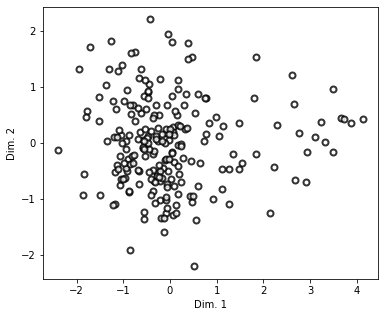

In [17]:
plt.figure(figsize=(6, 5))

sns.scatterplot(
    data=coord,
    x="Dim. 1",
    y="Dim. 2",
    color="white",
    alpha=0.8,
    edgecolor="black",
    linewidth=2,
)

In [18]:
dim.tail()

,x,y
215,6.033099,6.553233
216,11.087329,9.659197
217,10.483759,5.822337
218,17.902546,11.648966
219,9.073123,10.482268


In [19]:
k = 12
index = 205

pr = Projection()
proj, mod = pr.fit_transform(dim, nf=2)

x_center = proj.iloc[205]["Dim. 1"]
y_center = proj.iloc[205]["Dim. 2"]

for index in [208, 209, 205]:

    pr = Projection()
    proj, mod = pr.fit_transform(dim, nf=2)
    avatar_hm = pd.DataFrame(columns=df.columns)
    seed = 1
    nb_avat = 150
    for iter in range(nb_avat):
        avat_temp = avatarize(dim, k=k, ncp=2, seed=seed)
        seed += 1
        row_temp = avat_temp.loc[index]
        avatar_hm = avatar_hm.append(row_temp)

    avatar_proj = pr.transform(avatar_hm)
    avatar_proj.shape

    nn = NearestNeighbors(
        n_neighbors=k + 1, algorithm="ball_tree", metric="minkowski"
    ).fit(proj)

    # Get distances and indices of NN
    distances, indices = nn.kneighbors(proj)
    proj["ind"] = "other"
    proj.loc[
        indices[
            index,
        ],
        "ind",
    ] = "neighbors"
    proj.loc[index, "ind"] = "interest"

    #######____________________________________________________________

    ### Figure density + link with neighbors

    paper_rc = {"lines.markersize": 11}
    sns.set_context("paper", font_scale=3, rc=paper_rc)
    with plt.style.context("seaborn-white"):
        plt.rcParams["axes.edgecolor"] = "0.15"
        plt.rcParams["axes.linewidth"] = 1.25
        plt.rcParams["font.family"] = "sans-serif"
        plt.rcParams["font.sans-serif"] = ["Helvetica"]
        fig = plt.figure(figsize=(10, 10))  # create a figure object
        ax1 = fig.add_subplot()

    cmap = sns.light_palette("#a7b2af", as_cmap=True)

    ax1 = sns.kdeplot(
        x="Dim. 1",
        y="Dim. 2",
        data=avatar_proj,
        cmap=cmap,
        shade=True,
        bw_adjust=0.7,
        shade_lowest=False,
        cbar=False,
        thresh=0.0001,
        n_levels=40,
        linewidths=0,
    )

    xi = proj.loc[proj["ind"] == "interest"]["Dim. 1"].values[0]
    yi = proj.loc[proj["ind"] == "interest"]["Dim. 2"].values[0]

    for i in range(k):
        x = proj.loc[proj["ind"] == "neighbors"]["Dim. 1"].values[i]
        y = proj.loc[proj["ind"] == "neighbors"]["Dim. 2"].values[i]
        plt.plot([xi, x], [yi, y], linewidth=2, color="black", alpha=0.8, linestyle=":")

    sns.scatterplot(
        x="Dim. 1",
        y="Dim. 2",
        data=proj,
        hue="ind",
        style="ind",
        markers=["o", "o", "o"],
        palette=[
            colors.loc["original", "color"],
            colors.loc["original", "color"],
            "black",
        ],
        zorder=10,
        s=400,
        edgecolor=["black", "black", "black"],
        linewidth=1.5,
    )

    ax1.set_xlim([x_center - 1.5, x_center + 1.5])
    ax1.set_ylim([y_center - 1.25, y_center + 1.75])
    ax1.legend().set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("")

    plt.savefig(
        "../../figure/method_presentation/density_plot" + str(index) + ".svg",
        format="svg",
        dpi=600,
    )

    plt.show()

    ### End figure step 1

    avatar_proj["ind"] = "avatar"
    concat = pd.concat([proj, avatar_proj.loc[[1]]], axis=0)  # 6 , 15
    dots = concat[(concat.ind == "interest") | (concat.ind == "avatar")]

    #######___________________________________________________________

    # Figure density + avatar and his individual
    plt.figure(figsize=(10, 10))

    cmap = sns.light_palette("#a7b2af", as_cmap=True)
    ax1 = sns.kdeplot(
        x="Dim. 1",
        y="Dim. 2",
        data=avatar_proj,
        cmap=cmap,
        shade=True,
        bw_adjust=0.7,
        shade_lowest=False,
        cbar=False,
        thresh=0.0001,
        n_levels=40,
        linewidths=0,
    )

    x = concat.loc[concat["ind"] == "avatar"]["Dim. 1"].values[0]
    y = concat.loc[concat["ind"] == "avatar"]["Dim. 2"].values[0]

    sns.scatterplot(
        x="Dim. 1",
        y="Dim. 2",
        data=dots,
        hue="ind",
        style="ind",
        markers=["o", "o"],
        palette=["black", colors.loc["avatar", "color"]],
        zorder=10,
        s=400,
        edgecolor=["black", "black"],
        linewidth=1.5,
    )

    plt.plot([xi, x], [yi, y], linewidth=2, color="black", alpha=0.8, linestyle="-")
    ax1.set_xlim([x_center - 1.5, x_center + 1.5])
    ax1.set_ylim([y_center - 1.25, y_center + 1.75])
    ax1.legend().set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("")
    plt.savefig(
        "../../figure/method_presentation/avatar_plot" + str(index) + ".svg",
        format="svg",
        dpi=600,
    )

    plt.show()
    ### End figure step 2

    avat_proj = pr.transform(avat_temp)

    avat_proj["ind"] = "avatar"

    concat2 = pd.concat([concat, avat_proj], axis=0)
    concat2["edge_color"] = colors.loc["original", "color"]

    concat2.loc[concat2["ind"] == "avatar", "edge_color"] = colors.loc[
        "avatar", "color"
    ]
    color_list = list(concat2["edge_color"])
    dots2 = concat2[(concat2.ind == "interest") | (concat2.ind == "avatar")]

    #######___________________________________________________________

    # Figure metrics circle

    plt.figure(figsize=(10, 10))

    ax4 = sns.scatterplot(
        x="Dim. 1",
        y="Dim. 2",
        data=dots2,
        hue="ind",
        style="ind",
        markers=["o", "o"],
        palette=["black", "#67C6A7"],
        zorder=10,
        s=400,
        edgecolor="black",
        linewidth=1.5,
    )

    x = concat.loc[concat["ind"] == "avatar"]["Dim. 1"].values[0]
    y = concat.loc[concat["ind"] == "avatar"]["Dim. 2"].values[0]

    plt.plot([xi, x], [yi, y], linewidth=2, color="Black", alpha=0.8, linestyle="-")
    r = sqrt((xi - x) ** 2 + (y - yi) ** 2)

    circle = plt.Circle(
        (xi, yi), r, color="Black", linewidth=2, linestyle=":", fill=False
    )
    ax4.add_patch(circle)

    ax4.set_xlim([x_center - 1.5, x_center + 1.5])
    ax4.set_ylim([y_center - 1.25, y_center + 1.75])
    ax4.legend().set_visible(False)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel("")
    plt.ylabel("")

#     plt.savefig(
#         "../../figure/method_presentation/metric_plot" + str(index) + ".svg",
#         format="svg",
#         dpi=600,
#     )
    plt.show()

Regarding variables types, a PCA is performed for dimension reduction
Regarding variables types, a PCA is performed for dimension reduction


NameError: name 'avatarize' is not defined

In [105]:
concat

,Dim. 1,Dim. 2,ind
0,-0.276463,-0.529787,other
1,0.766621,0.154777,other
2,-1.060310,-0.744933,other
3,0.281264,-0.272657,other
4,-0.478799,0.911350,other
...,...,...,...
216,3.098821,0.100136,neighbors
217,3.488597,-0.164190,neighbors
218,2.220949,-0.438524,neighbors
219,3.237988,0.379618,neighbors


In [106]:
avat_proj = pr.transform(avat_temp)

avat_proj["ind"] = "avatar"

concat2 = pd.concat([concat, avat_proj], axis=0)
concat2["edge_color"] = colors.loc["original", "color"]

concat2.loc[concat2["ind"] == "avatar", "edge_color"] = colors.loc["avatar", "color"]

In [107]:
concat2.tail(15)

,Dim. 1,Dim. 2,ind,edge_color
205,2.516758,-0.331494,avatar,#67C6A7
206,2.997702,0.199755,avatar,#67C6A7
207,3.437325,0.020772,avatar,#67C6A7
208,2.473202,0.516400,avatar,#67C6A7
209,2.759624,0.427215,avatar,#67C6A7
210,3.588263,0.316877,avatar,#67C6A7
211,3.118453,0.168508,avatar,#67C6A7
212,0.970790,0.658969,avatar,#67C6A7
213,3.461248,0.778463,avatar,#67C6A7
214,3.047083,0.625331,avatar,#67C6A7


In [115]:
color_list = list(concat2["edge_color"])
dots2 = concat2[(concat2.ind == "interest") | (concat2.ind == "avatar")]

<function matplotlib.pyplot.show(close=None, block=None)>

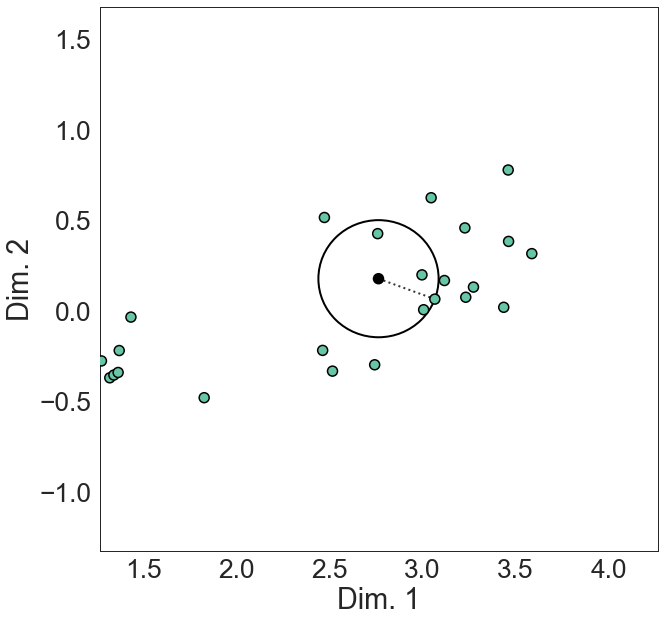

In [116]:
plt.figure(figsize=(10, 10))

ax4 = sns.scatterplot(
    x="Dim. 1",
    y="Dim. 2",
    data=dots2,
    hue="ind",
    style="ind",
    markers=["o", "o"],
    palette=["black", "#67C6A7"],
    zorder=10,
    s=100,
    edgecolor="black",
    linewidth=1.5,
)

x = concat.loc[concat["ind"] == "avatar"]["Dim. 1"].values[0]
y = concat.loc[concat["ind"] == "avatar"]["Dim. 2"].values[0]

plt.plot([xi, x], [yi, y], linewidth=2, color="Black", alpha=0.8, linestyle=":")
r = sqrt((xi - x) ** 2 + (y - yi) ** 2)

circle = plt.Circle((xi, yi), r, color="Black", linewidth=2, fill=False)
ax4.add_patch(circle)


ax4.set_xlim([xi - 1.5, xi + 1.5])
ax4.set_ylim([yi - 1.5, yi + 1.5])
ax4.legend().set_visible(False)


plt.show

## Color figure

In [ ]:
len(color_list)

In [ ]:
plt.figure(figsize=(14, 10))

cmap = sns.light_palette("#3bd6b0", as_cmap=True)

sns.kdeplot(
    x="Dim. 1",
    y="Dim. 2",
    data=avatar_proj,
    shade=True,
    shade_lowest=False,
    cbar=True,
    thresh=0.01,
    n_levels=40,
    cmap=cmap,
)


xi = proj.loc[proj["ind"] == "interest"]["Dim. 1"].values[0]
yi = proj.loc[proj["ind"] == "interest"]["Dim. 2"].values[0]

for i in range(k):
    x = proj.loc[proj["ind"] == "neighbors"]["Dim. 1"].values[i]
    y = proj.loc[proj["ind"] == "neighbors"]["Dim. 2"].values[i]
    plt.plot([xi, x], [yi, y], linewidth=2, color="black", alpha=0.8, linestyle=":")

color_list = list(np.repeat("black", 5)) + ["magenta"] + list(np.repeat("black", 14))
sns.scatterplot(
    x="Dim. 1",
    y="Dim. 2",
    data=proj,
    hue="ind",
    style="ind",
    markers=["^", "^", "o"],
    palette=["white", "white", "white"],
    edgecolor=color_list,
    zorder=10,
    s=100,
    linewidth=3,
)

plt.show()

In [ ]:
plt.figure(figsize=(14, 10))

cmap = sns.light_palette("#3bd6b0", as_cmap=True)

sns.kdeplot(
    x="Dim. 1",
    y="Dim. 2",
    data=avatar_proj,
    shade=True,
    shade_lowest=False,
    cbar=True,
    thresh=0.01,
    n_levels=40,
    cmap=cmap,
)


color_list = (
    list(np.repeat("black", 5))
    + ["magenta"]
    + list(np.repeat("black", 14))
    + ["magenta"]
)
sns.scatterplot(
    x="Dim. 1",
    y="Dim. 2",
    data=concat,
    hue="ind",
    style="ind",
    markers=["^", "^", "o", "*"],
    palette=["white", "white", "white", "white"],
    edgecolor=color_list,
    zorder=10,
    s=100,
    linewidth=3,
)


x = concat.loc[concat["ind"] == "avatar"]["Dim. 1"].values[0]
y = concat.loc[concat["ind"] == "avatar"]["Dim. 2"].values[0]

plt.plot([xi, x], [yi, y], linewidth=2, color="magenta", alpha=0.8)
plt.show()

In [ ]:
plt.figure(figsize=(10, 10))


ax4 = sns.scatterplot(
    x="Dim. 1",
    y="Dim. 2",
    data=concat,
    hue="ind",
    style="ind",
    markers=["^", "^", "o", "*"],
    palette=["white", "white", "white", "white"],
    edgecolor=color_list,
    zorder=10,
    s=100,
    linewidth=3,
)

x = concat.loc[concat["ind"] == "avatar"]["Dim. 1"].values[0]
y = concat.loc[concat["ind"] == "avatar"]["Dim. 2"].values[0]

plt.plot([xi, x], [yi, y], linewidth=2, color="magenta", alpha=0.8)
r = sqrt((xi - x) ** 2 + (y - yi) ** 2)
circle = plt.Circle((xi, yi), r, color="#3BD6B0", fill=False)
ax4.add_patch(circle)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show

## Local cloaking figure 

In [ ]:
np.unique(concat.ind)

concat3 = concat2.loc[concat2["ind"].isin(["avatar", "interest"])]
np.unique(concat3.ind)

In [ ]:
plt.figure(figsize=(10, 10))

ax4 = sns.scatterplot(
    x="Dim. 1",
    y="Dim. 2",
    data=concat3,
    hue="ind",
    style="ind",
    markers=["o", "o"],
    palette=["black", colors.loc["avatar", "color"]],
    zorder=10,
    s=100,
    edgecolor="black",
    linewidth=1.5,
)

x = concat.loc[concat["ind"] == "avatar"]["Dim. 1"].values[0]
y = concat.loc[concat["ind"] == "avatar"]["Dim. 2"].values[0]

plt.plot([xi, x], [yi, y], linewidth=2, color="Black", alpha=0.8)
r = sqrt((xi - x) ** 2 + (y - yi) ** 2)

circle = plt.Circle((xi, yi), r, color="Black", linewidth=2, fill=False)
ax4.add_patch(circle)


ax4.set_xlim([xi - 1.5, xi + 1.5])
ax4.set_ylim([yi - 1.5, yi + 1.5])

plt.show

In [ ]:
plt.figure(figsize=(10, 10))

ax4 = sns.scatterplot(
    x="Dim. 1",
    y="Dim. 2",
    data=concat3,
    hue="ind",
    style="ind",
    markers=["o", "^"],
    palette=["black", "black"],
    zorder=10,
    s=100,
    edgecolor="black",
    linewidth=3,
)

x = concat2.iloc[210]["Dim. 1"]
y = concat2.iloc[210]["Dim. 2"]

plt.plot([xi, x], [yi, y], linewidth=2, color="Black", alpha=0.8)
r = sqrt((xi - x) ** 2 + (y - yi) ** 2)

circle = plt.Circle((xi, yi), r, color="Black", linewidth=2, fill=False)
ax4.add_patch(circle)


ax4.set_xlim([xi - 1.5, xi + 1.5])
ax4.set_ylim([yi - 1.5, yi + 1.5])

plt.show

In [ ]:
concat2.iloc[15]
concat2.loc[concat2["ind"] == "avatar"]